In [55]:
import torch
import pandas as pd
from torchvision.transforms import (
    Compose,
    Resize,
    CenterCrop,
    ToTensor,
    Normalize,
)
from PIL import Image
from train import get_device
from torch.nn import Softmax
from sklearn.metrics import confusion_matrix

device = get_device()

Using mps device


In [45]:
model_path = "models/resisc45_resnet_f4_e5.pt"

In [46]:
model = torch.load(model_path)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [47]:
image_transforms = Compose([
    Resize(256),
    CenterCrop(224),
    ToTensor(),
    Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [48]:
data = pd.read_csv("dataset_resisc45.csv")

In [49]:
data = data[data["fold"] == 4]

In [50]:
labels = [
    'forest',
    'railway_station',
    'tennis_court',
    'basketball_court',
    'river',
    'storage_tank',
    'harbor',
    'terrace',
    'thermal_power_station',
    'golf_course',
    'runway',
    'roundabout',
    'bridge',
    'industrial_area',
    'baseball_diamond',
    'mobile_home_park',
    'overpass',
    'church',
    'chaparral',
    'railway',
    'stadium',
    'medium_residential',
    'sea_ice',
    'intersection',
    'lake',
    'palace',
    'airplane',
    'cloud',
    'sparse_residential',
    'airport',
    'snowberg',
    'parking_lot',
    'commercial_area',
    'rectangular_farmland',
    'island',
    'beach',
    'circular_farmland',
    'dense_residential',
    'ship',
    'mountain',
    'desert',
    'freeway',
    'meadow',
    'wetland',
    'ground_track_field',
]

In [79]:
len(data)

6300

In [85]:
data['label'].value_counts()

label
circular_farmland        172
island                   156
desert                   155
overpass                 155
sea_ice                  152
rectangular_farmland     152
freeway                  150
cloud                    150
bridge                   150
railway_station          150
wetland                  147
sparse_residential       147
harbor                   146
baseball_diamond         145
railway                  144
parking_lot              144
basketball_court         144
dense_residential        143
thermal_power_station    143
lake                     141
church                   140
meadow                   140
mobile_home_park         140
terrace                  139
medium_residential       139
ship                     139
intersection             138
roundabout               138
palace                   137
airplane                 136
runway                   136
ground_track_field       135
storage_tank             135
golf_course              134
river   

In [58]:
argmax_list = []
expected_list = []
for idx in range(len(data)):
    img_path = data.iloc[idx, 0]
    label_index = data.iloc[idx, 2]
    label_name = data.iloc[idx, 1]
    image = Image.open(img_path)
    image = image_transforms(image)
    image = image.to(device)
    logits = model.forward(image.unsqueeze(0))
    argmax = Softmax(dim=1)(logits).argmax(1).item()
    argmax_list.append(argmax)
    expected_list.append(label_index)
    


In [59]:
cm = confusion_matrix(y_true=argmax_list, y_pred=expected_list)

In [61]:
import matplotlib.pyplot as plt
import itertools
import numpy as np

In [73]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20, 20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[118   0   0 ...   7  14   0]
 [  0 100   0 ...   0   0   2]
 [  0   0  71 ...   0   0   0]
 ...
 [  7   0   1 ... 121   3   0]
 [  4   0   0 ...   2 108   0]
 [  0   0   0 ...   0   1 103]]


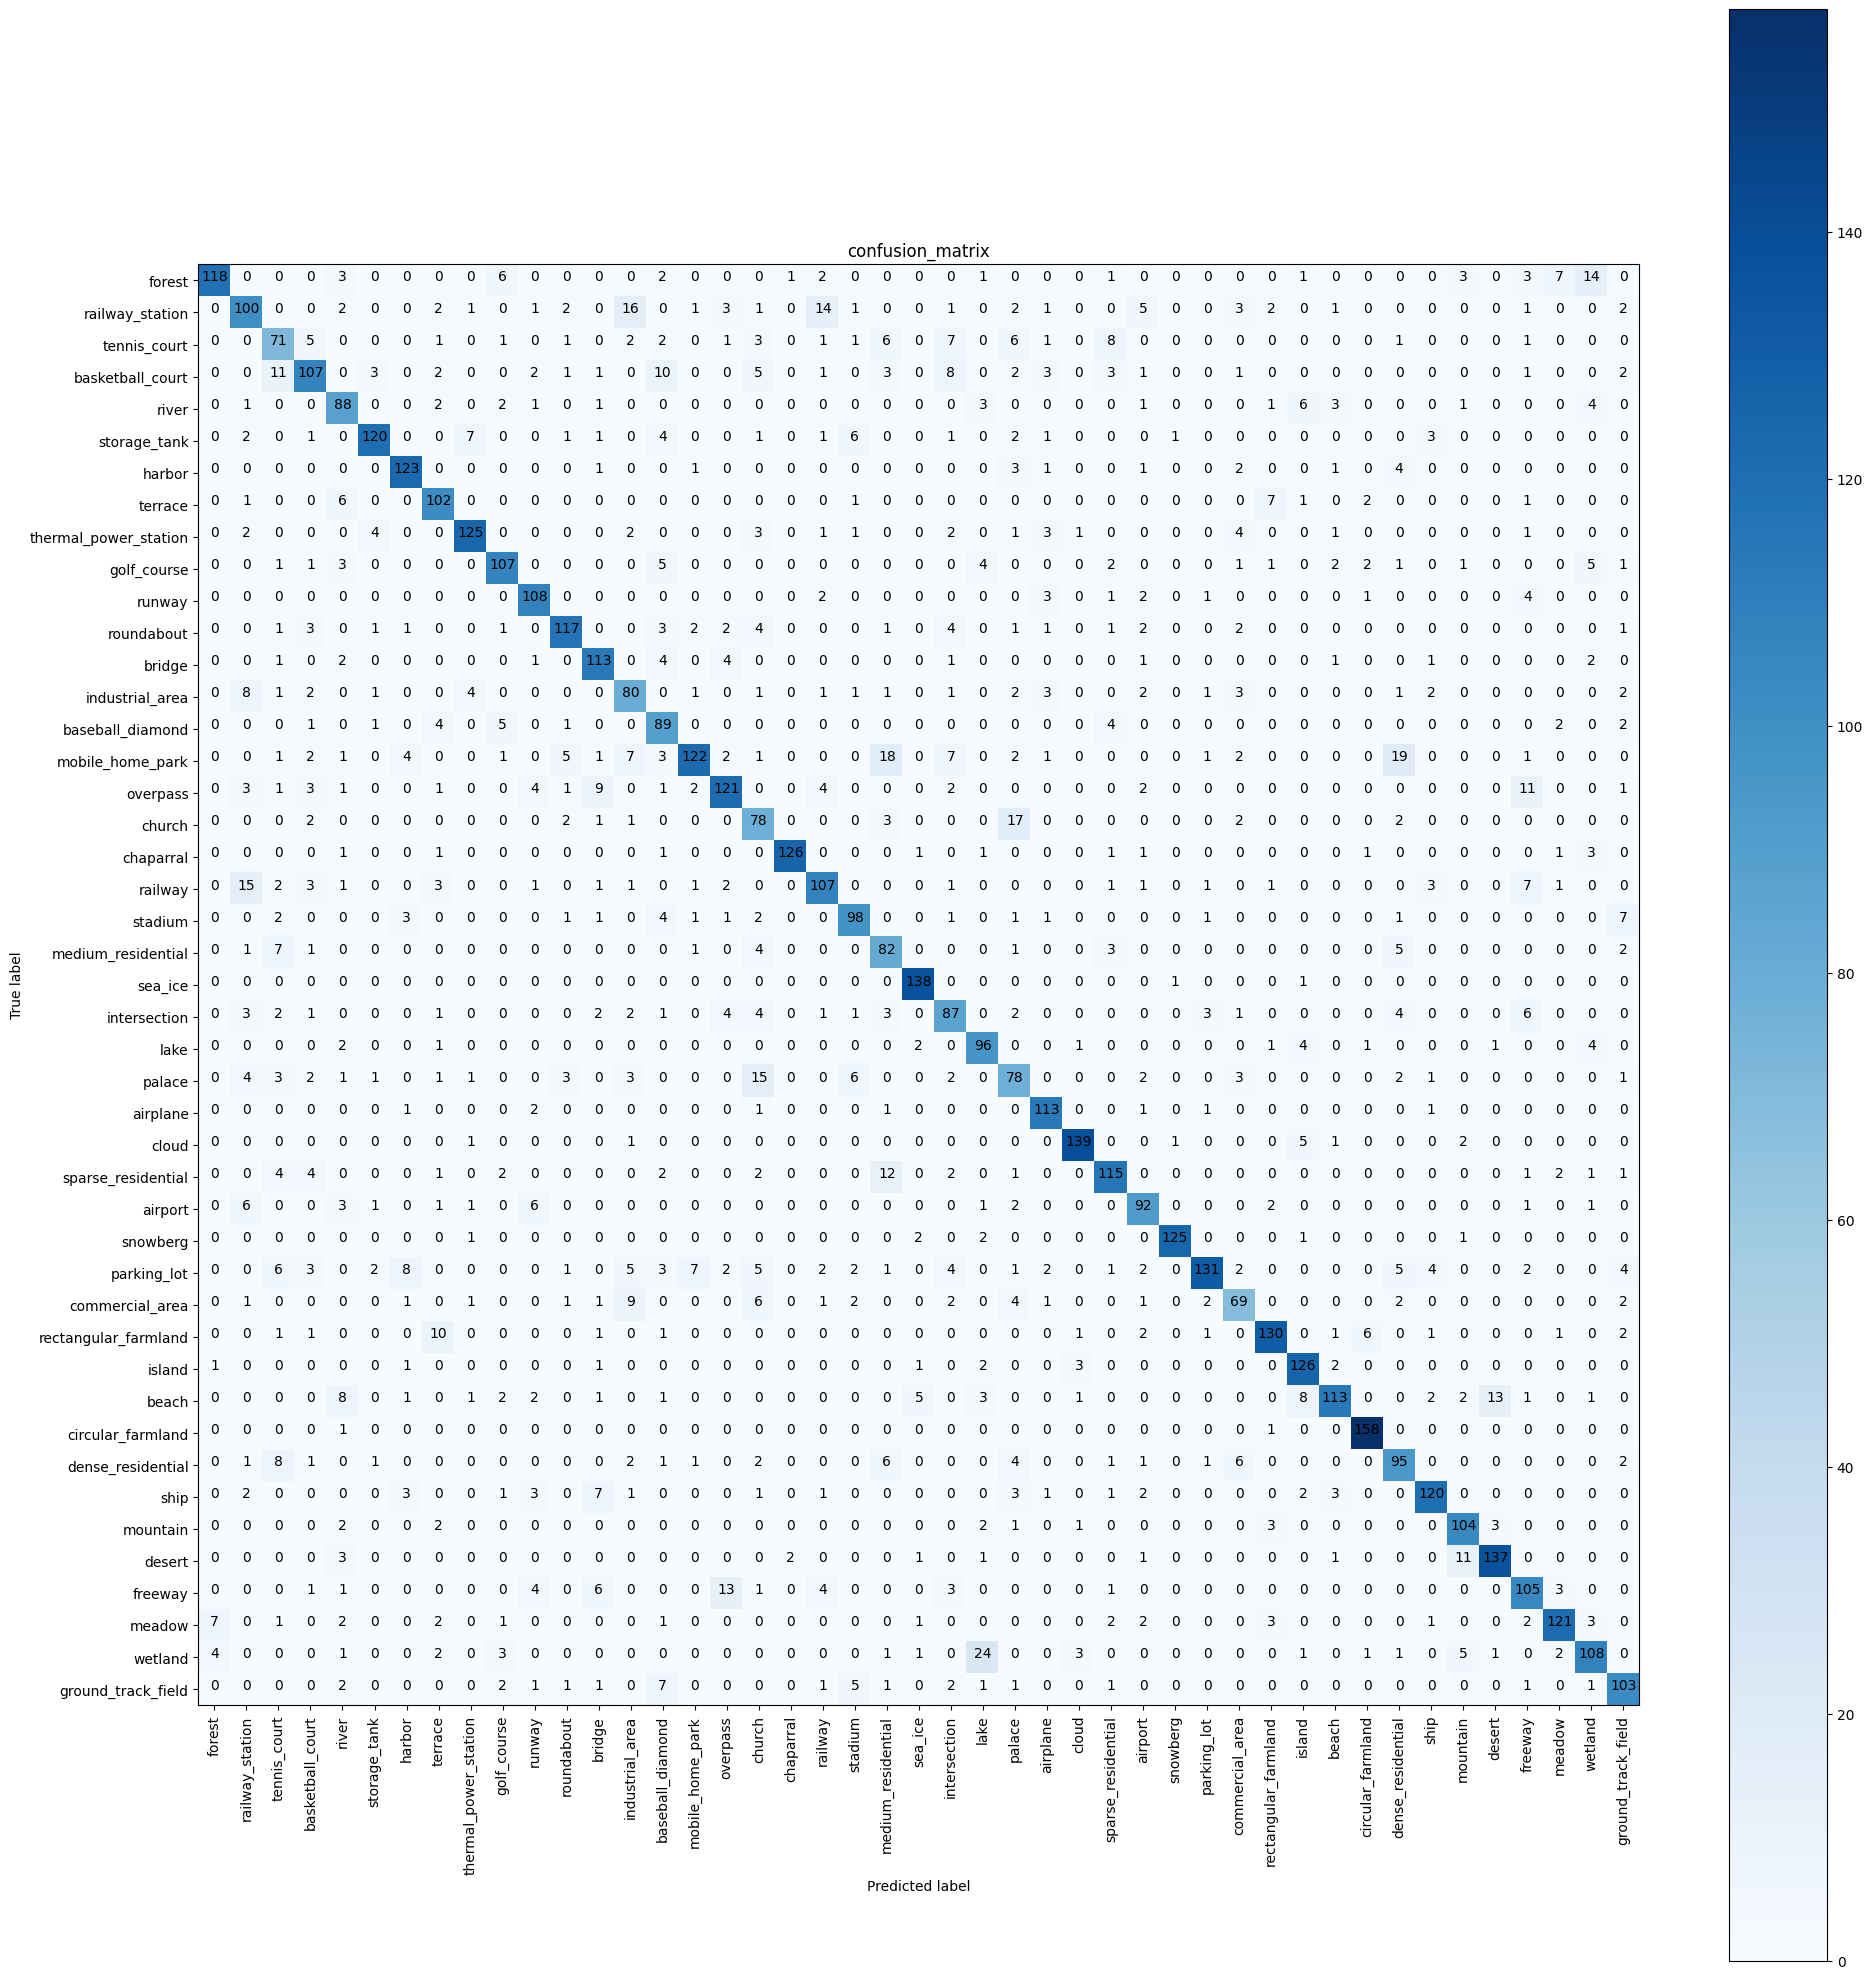

In [74]:
cm_plot_labels = labels
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='confusion_matrix')